# Analysis the parameter sensitivity

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import util

## Loading data

In [128]:
df_results = pd.read_csv('data/output/sensitivity_analysis_results.csv')

## Analyzing

In [129]:
def plot_heatmap(df):
    plt.rc('font', size=10)
    sns.set_style("ticks")
    
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(10), util.centimeter_to_inch(22.23)))
    
    # Plot the heatmap
    sns.heatmap(df, annot=True, cmap="Reds", fmt=".2f", linewidths=.5)
    
    # Set the title and labels
    plt.xlabel("Parameter perturbation")
    plt.ylabel("Model parameter")
    
    fig.tight_layout()
    filename = 'images/sensitivity_analysis'
    plt.savefig(filename+'.pdf', bbox_inches="tight")
    plt.savefig(filename+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
    img = Image.open(filename+".tiff")
    img.save(filename+"_compressed.tiff", compression="tiff_lzw")
    plt.show()

In [130]:
df_results.elasticity.describe()

count    123.000000
mean       1.736571
std        3.765381
min       -4.794988
25%        0.004834
50%        0.297518
75%        1.597075
max       24.251962
Name: elasticity, dtype: float64

In [131]:
df_results['absolute_elasticity'] = abs(df_results.elasticity)

In [132]:
df_results.absolute_elasticity.describe()

count    123.000000
mean       1.940487
std        3.663624
min        0.000000
25%        0.031273
50%        0.369032
75%        2.154534
max       24.251962
Name: absolute_elasticity, dtype: float64

In [133]:
df_results.groupby('simulation_pertubation')[['absolute_elasticity']].describe()

absolute_elasticity                                \
                                     count      mean       std       min   
simulation_pertubation                                                     
1.01                                  42.0  1.096597  1.928159  0.000000   
1.10                                  41.0  2.604288  4.341085  0.000000   
1.50                                  40.0  2.146174  4.180548  0.000702   

                                                                 
                             25%       50%       75%        max  
simulation_pertubation                                           
1.01                    0.008644  0.265675  1.393113  10.392508  
1.10                    0.041841  0.485085  3.939445  19.302604  
1.50                    0.043391  0.702901  2.758401  24.251962

In [134]:
df_results_general = df_results[['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

# Define the desired order of parameter groups
custom_order = [
    'x_initial_infected_population',
    *sorted([f'x_breakpoint_{i}' for i in range(1, 11)], key=lambda x: int(x.split('_')[-1])),
    *sorted([f'x_transition_days_between_epidemic_periods_{i}' for i in range(1, 11)], key=lambda x: int(x.split('_')[-1])),
    *sorted([f'x_days_between_infections_{i}' for i in range(0, 11)], key=lambda x: int(x.split('_')[-1])),
    *sorted([f'x_case_fatality_probability_{i}' for i in range(0, 5)], key=lambda x: int(x.split('_')[-1])),
    *sorted([f'x_loss_immunity_in_days_{i}' for i in range(0, 5)], key=lambda x: int(x.split('_')[-1]))
]

df_results_general = df_results_general.reindex(custom_order).reset_index()

In [135]:
df_results_general.loc[df_results_general.simulation_parameter == 'x_initial_infected_population', 'simulation_parameter'] = '$I(0)$'
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_1', 'simulation_parameter'] = "$b^{'}_{0}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_2', 'simulation_parameter'] = "$b_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_3', 'simulation_parameter'] = "$b^{'}_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_4', 'simulation_parameter'] = "$b_{2}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_5', 'simulation_parameter'] = "$b_{3}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_6', 'simulation_parameter'] = "$b_{4}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_7', 'simulation_parameter'] = "$b_{5}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_8', 'simulation_parameter'] = "$b_{6}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_9', 'simulation_parameter'] = "$b_{7}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_breakpoint_10', 'simulation_parameter'] = "$b_{8}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_case_fatality_probability_0', 'simulation_parameter'] = "$f_{0}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_case_fatality_probability_1', 'simulation_parameter'] = "$f^{'}_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_case_fatality_probability_2', 'simulation_parameter'] = "$f_{4}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_case_fatality_probability_3', 'simulation_parameter'] = "$f_{5}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_case_fatality_probability_4', 'simulation_parameter'] = "$f_{7}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_0', 'simulation_parameter'] = "$\\beta_{0}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_1', 'simulation_parameter'] = "$\\beta^{'}_{0}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_2', 'simulation_parameter'] = "$\\beta_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_3', 'simulation_parameter'] = "$\\beta^{'}_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_4', 'simulation_parameter'] = "$\\beta_{2}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_5', 'simulation_parameter'] = "$\\beta_{3}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_6', 'simulation_parameter'] = "$\\beta_{4}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_7', 'simulation_parameter'] = "$\\beta_{5}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_8', 'simulation_parameter'] = "$\\beta_{6}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_9', 'simulation_parameter'] = "$\\beta_{7}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_days_between_infections_10', 'simulation_parameter'] = "$\\beta_{8}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_loss_immunity_in_days_0', 'simulation_parameter'] = "$\\omega_{0}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_loss_immunity_in_days_1', 'simulation_parameter'] = "$\\omega^{'}_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_loss_immunity_in_days_2', 'simulation_parameter'] = "$\\omega_{4}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_loss_immunity_in_days_3', 'simulation_parameter'] = "$\\omega_{5}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_loss_immunity_in_days_4', 'simulation_parameter'] = "$\\omega_{7}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_1', 'simulation_parameter'] = "$\\tau^{'}_{0}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_2', 'simulation_parameter'] = "$\\tau_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_3', 'simulation_parameter'] = "$\\tau^{'}_{1}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_4', 'simulation_parameter'] = "$\\tau_{2}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_5', 'simulation_parameter'] = "$\\tau_{3}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_6', 'simulation_parameter'] = "$\\tau_{4}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_7', 'simulation_parameter'] = "$\\tau_{5}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_8', 'simulation_parameter'] = "$\\tau_{6}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_9', 'simulation_parameter'] = "$\\tau_{7}$"
df_results_general.loc[df_results_general.simulation_parameter == 'x_transition_days_between_epidemic_periods_10', 'simulation_parameter'] = "$\\tau_{8}$"
df_results_general = df_results_general.set_index('simulation_parameter')
df_results_general.columns = ['1%', '10%', '50%'] 

In [136]:
df_results_general

,1%,10%,50%
simulation_parameter,,,
$I(0)$,1.714952,0.907939,1.073170
$b^{'}_{0}$,10.392508,19.302604,24.251962
$b_{1}$,1.405205,0.416273,0.160567
$b^{'}_{1}$,0.079973,0.485079,0.909105
$b_{2}$,1.356838,4.565388,4.463926
$b_{3}$,0.149075,0.485085,2.735674
$b_{4}$,4.389979,11.484647,3.667273
$b_{5}$,0.260127,5.946388,1.479197
$b_{6}$,3.579074,9.829278,NaN


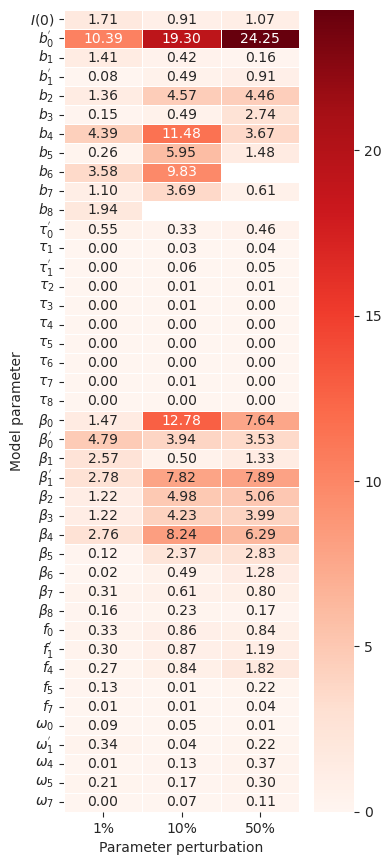

In [137]:
plot_heatmap(df_results_general)

In [138]:
df_results_x_initial_infected_population = df_results[df_results.simulation_parameter == 'x_initial_infected_population'][['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

In [139]:
df_results_x_initial_infected_population

simulation_pertubation,1.01,1.10,1.50
simulation_parameter,,,
x_initial_infected_population,1.714952,0.907939,1.07317


In [140]:
df_results[df_results['simulation_parameter'].str.startswith('x_days_between_infections_')][['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

simulation_pertubation,1.01,1.10,1.50
simulation_parameter,,,
x_days_between_infections_0,1.471436,12.781391,7.643427
x_days_between_infections_1,4.794988,3.939445,3.528630
x_days_between_infections_10,0.160203,0.226939,0.172139
x_days_between_infections_2,2.572885,0.499054,1.329029
x_days_between_infections_3,2.784606,7.821474,7.892269
x_days_between_infections_4,1.218367,4.976595,5.058594
x_days_between_infections_5,1.223440,4.233631,3.986813
x_days_between_infections_6,2.756512,8.237775,6.290161
x_days_between_infections_7,0.124823,2.365606,2.826582


In [141]:
df_results[df_results['simulation_parameter'].str.startswith('x_loss_immunity_in_days_')][['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

simulation_pertubation,1.01,1.10,1.50
simulation_parameter,,,
x_loss_immunity_in_days_0,0.089683,0.046621,0.012610
x_loss_immunity_in_days_1,0.340153,0.041841,0.220080
x_loss_immunity_in_days_2,0.010782,0.125606,0.369032
x_loss_immunity_in_days_3,0.210910,0.165981,0.297518
x_loss_immunity_in_days_4,0.003227,0.068260,0.112682


In [142]:
df_results[df_results['simulation_parameter'].str.startswith('x_case_fatality_probability_')][['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

simulation_pertubation,1.01,1.10,1.50
simulation_parameter,,,
x_case_fatality_probability_0,0.332600,0.862112,0.844749
x_case_fatality_probability_1,0.303026,0.870036,1.194584
x_case_fatality_probability_2,0.271224,0.840658,1.817644
x_case_fatality_probability_3,0.125245,0.012749,0.221041
x_case_fatality_probability_4,0.007931,0.011288,0.035096


In [143]:
df_results[df_results['simulation_parameter'].str.startswith('x_breakpoint_')][['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

simulation_pertubation,1.01,1.10,1.50
simulation_parameter,,,
x_breakpoint_1,10.392508,19.302604,24.251962
x_breakpoint_10,1.943462,NaN,NaN
x_breakpoint_2,1.405205,0.416273,0.160567
x_breakpoint_3,0.079973,0.485079,0.909105
x_breakpoint_4,1.356838,4.565388,4.463926
x_breakpoint_5,0.149075,0.485085,2.735674
x_breakpoint_6,4.389979,11.484647,3.667273
x_breakpoint_7,0.260127,5.946388,1.479197
x_breakpoint_8,3.579074,9.829278,NaN


In [144]:
df_results[df_results['simulation_parameter'].str.startswith('x_transition_days_between_epidemic_periods_')][['simulation_parameter','simulation_pertubation', 'absolute_elasticity']].pivot(index='simulation_parameter', columns='simulation_pertubation', values='absolute_elasticity')

simulation_pertubation,1.01,1.10,1.50
simulation_parameter,,,
x_transition_days_between_epidemic_periods_1,0.554465,0.330069,0.464606
x_transition_days_between_epidemic_periods_10,0.000000,0.001243,0.001010
x_transition_days_between_epidemic_periods_2,0.000000,0.027450,0.035442
x_transition_days_between_epidemic_periods_3,0.000000,0.056349,0.046041
x_transition_days_between_epidemic_periods_4,0.000000,0.010536,0.005199
x_transition_days_between_epidemic_periods_5,0.000000,0.007603,0.004352
x_transition_days_between_epidemic_periods_6,0.000000,0.000000,0.004285
x_transition_days_between_epidemic_periods_7,0.000000,0.000000,0.000702
x_transition_days_between_epidemic_periods_8,0.000000,0.000000,0.003516
